In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('application_data.csv')  # Replace with the actual path to your dataset

In [5]:
# 1. Understand the Dataset
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Summary Statistics:")
print(df.describe())


Dataset Shape: (307511, 122)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
Summary Statistics:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05 

In [7]:
# Handle missing values
# Fill missing values with median for numeric columns and mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\1495262722.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13772\1495262722.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
# Remove outliers using IQR method
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

In [71]:
threshold = 50

In [73]:
# Handling missing data - Dropping columns with more than 40% missing values
threshold =df = df.dropna(thresh=df.shape[0] * (threshold/100), axis=1)

# Example: Filling missing numerical values with the median
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Filling missing categorical values with mode
categorical_columns = df.select_dtypes(include=[object]).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [75]:
# 6. Final Check for Missing Values
print("Missing Values After Cleaning:")
print(df.isnull().sum())

Missing Values After Cleaning:
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64


In [77]:
# 7. Save the Cleaned Data
df.to_csv('cleaned_dataset5.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset5.csv'")

Cleaned dataset saved as 'cleaned_dataset5.csv'


In [79]:
# 8. Final Dataset Overview
print("Final Dataset Shape:", df.shape)

Final Dataset Shape: (4664, 122)


In [19]:
d=pd.read_csv("cleaned_dataset.csv")

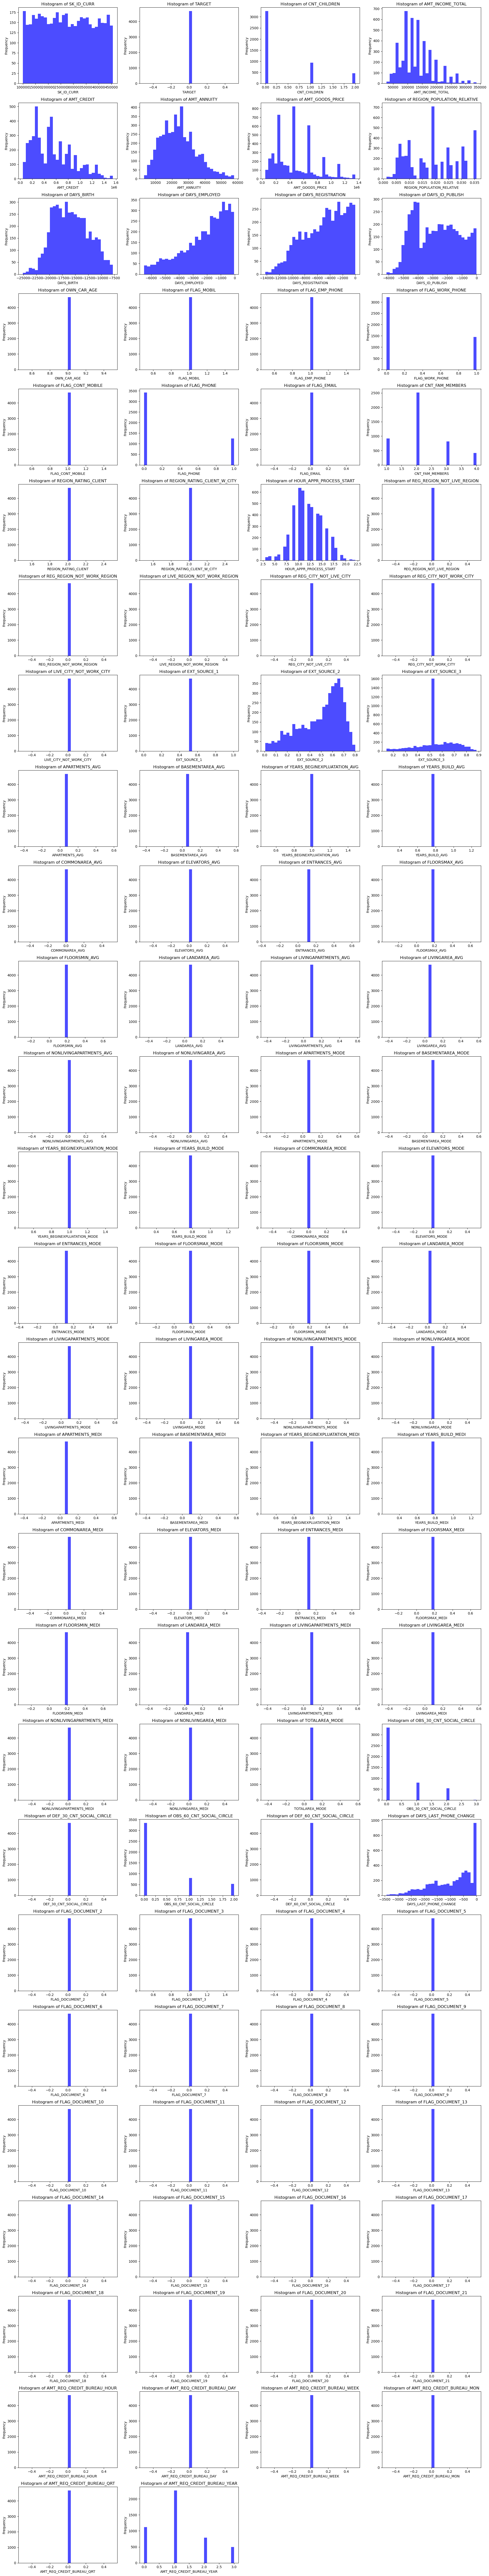

In [21]:
numeric_columns = d.select_dtypes(include=['number']).columns

# Set up the figure
plt.figure(figsize=(20, 120))

# Iterate over each numeric column and plot a histogram
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(31, 4, i)  # Adjust subplot grid to fit all histograms (31x4 grid for 122 features)
    plt.hist(d[column].dropna(), bins=30, color='blue', alpha=0.7)  # Drop NaN values if any
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()